In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [42]:
df=pd.read_csv("/content/air_quality_health_impact_data.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [44]:
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [45]:
print(df.isnull().sum())

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


In [46]:
print(df.duplicated().sum())

0


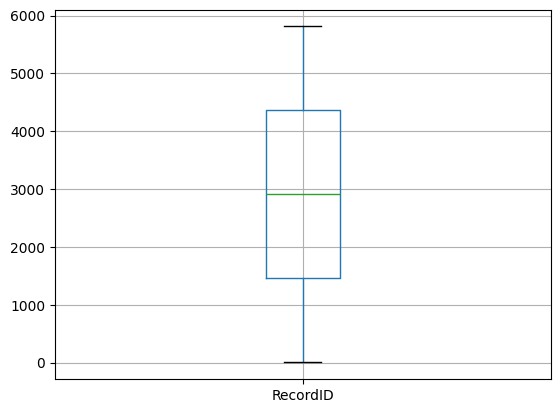

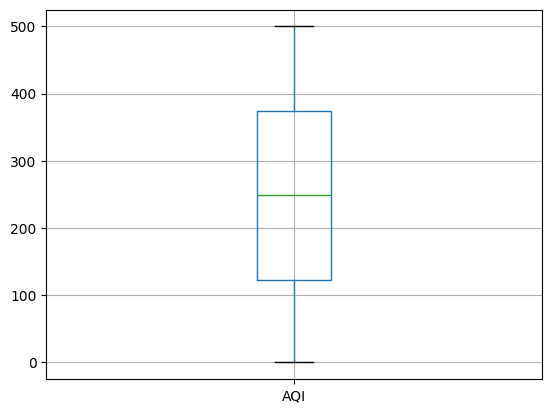

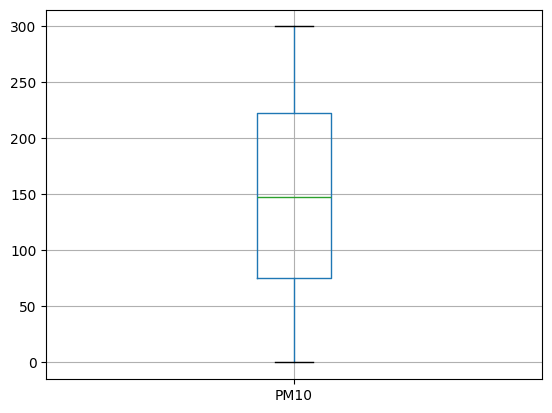

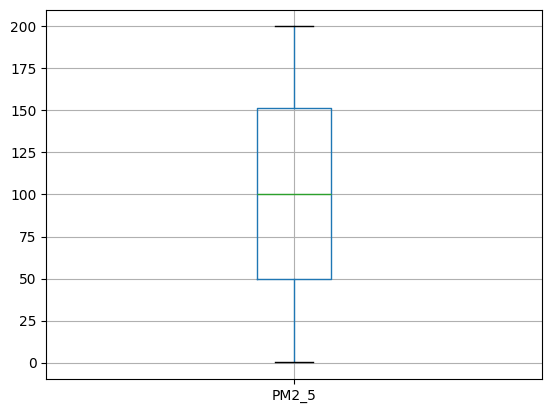

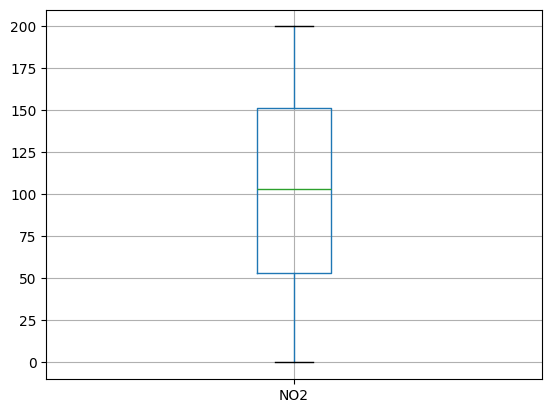

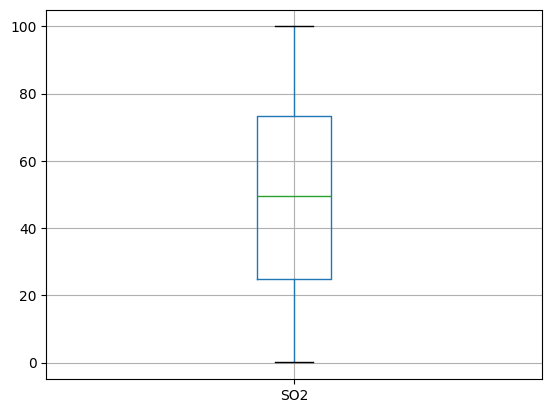

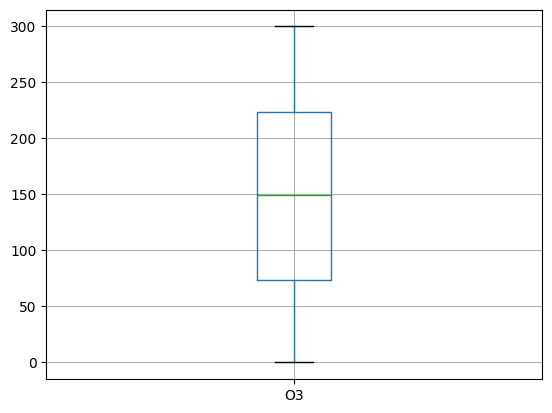

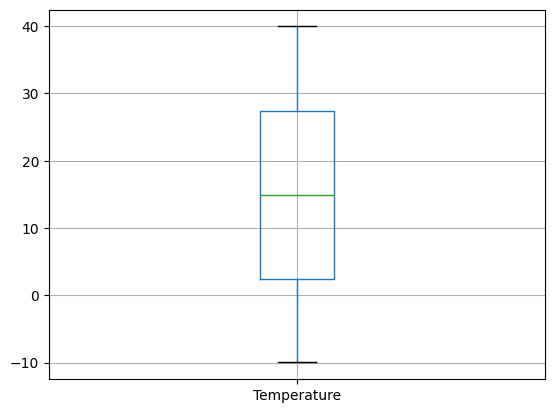

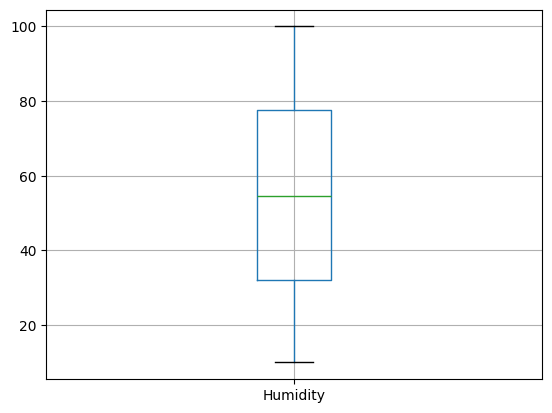

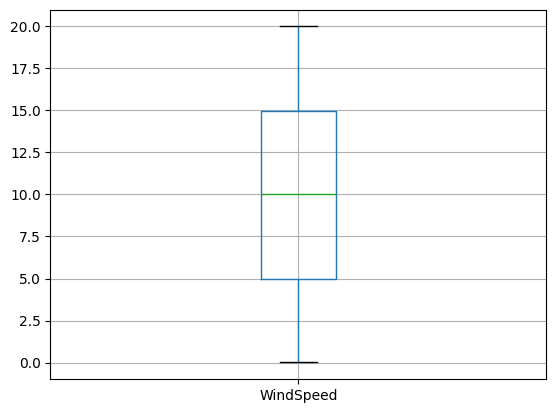

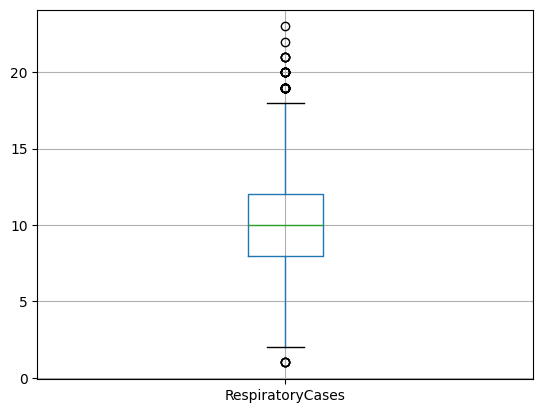

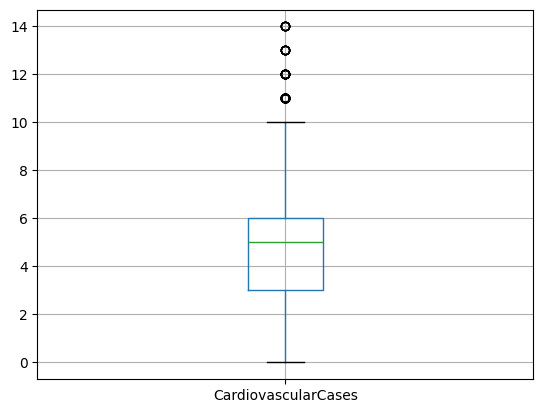

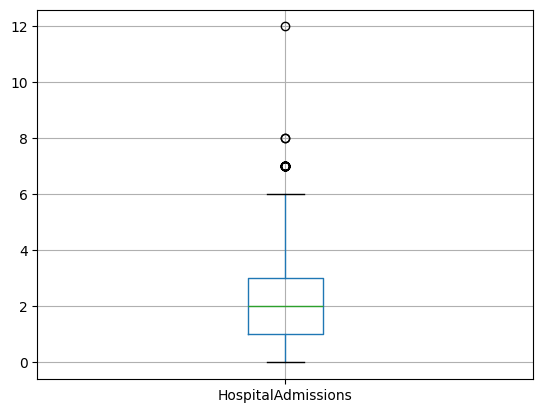

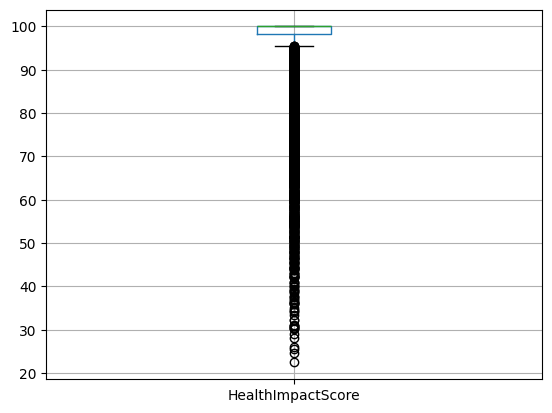

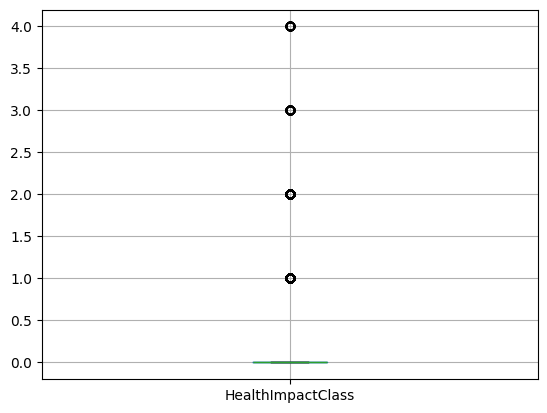

In [47]:
for i in df.columns:
  df.boxplot(column=i)
  plt.show()

In [48]:
df.drop(columns="HospitalAdmissions",inplace=True)

In [49]:
df

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,100.000000,4.0


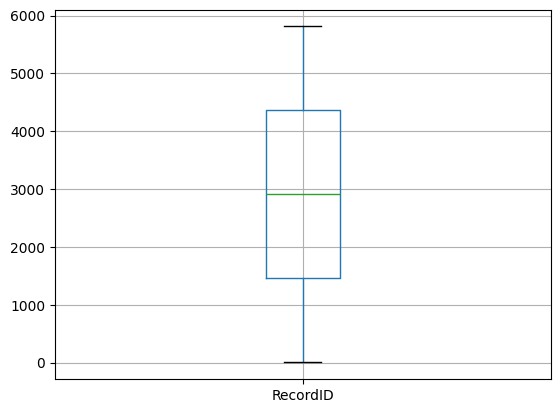

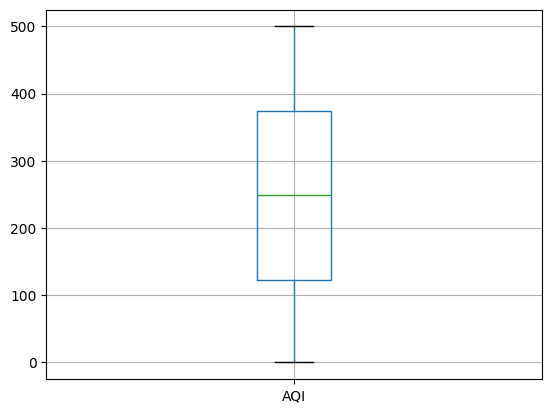

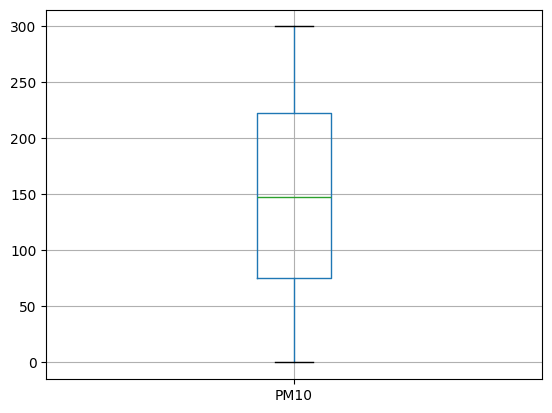

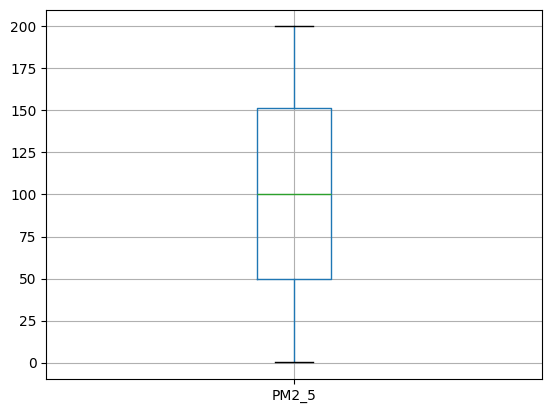

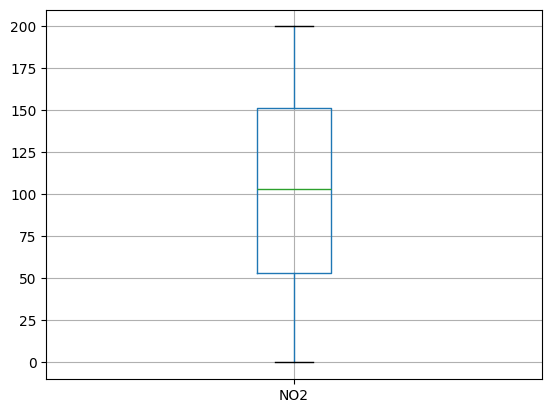

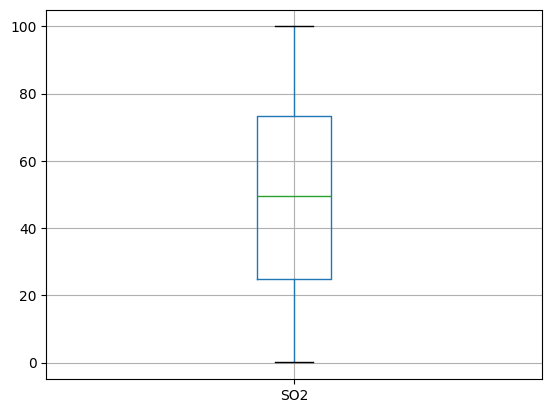

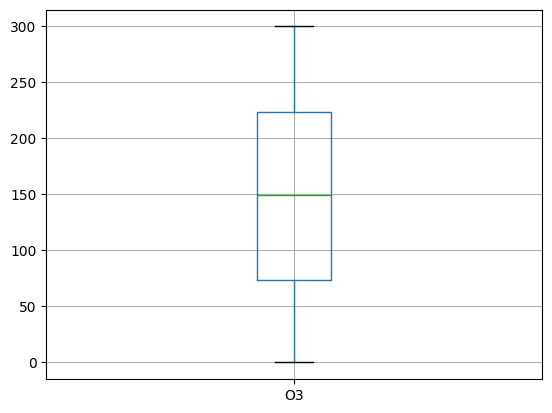

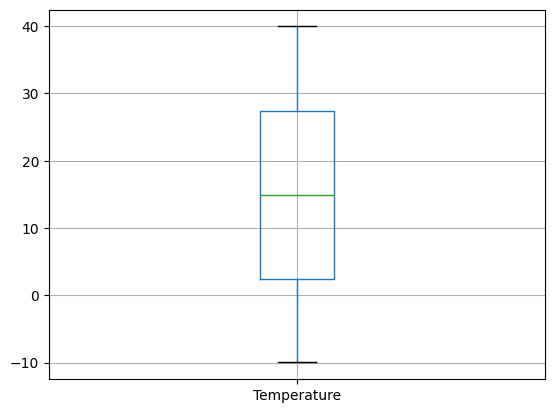

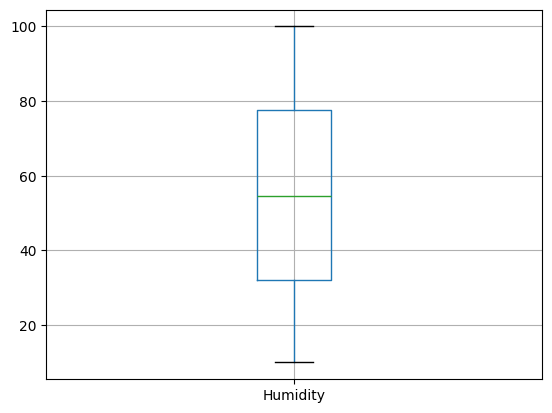

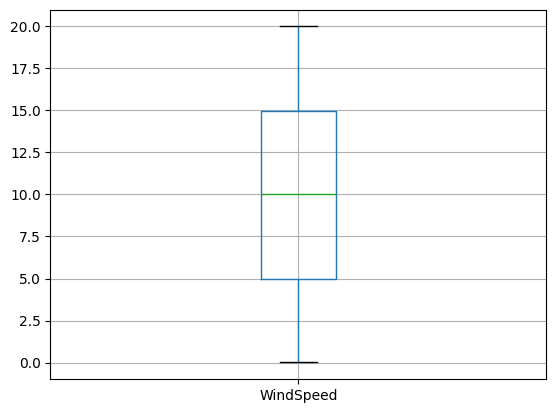

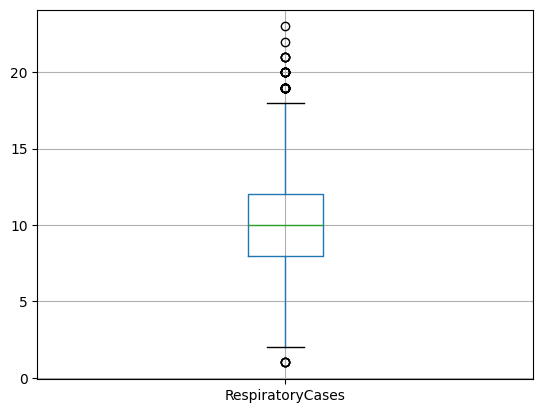

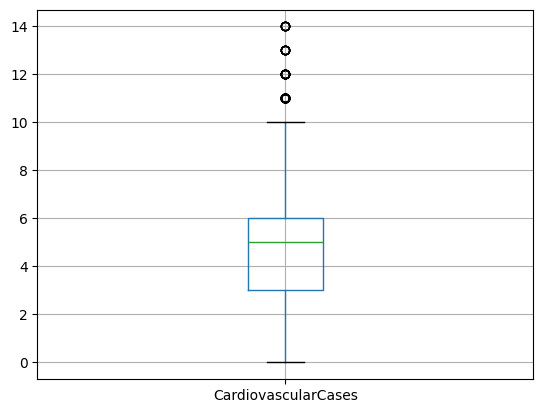

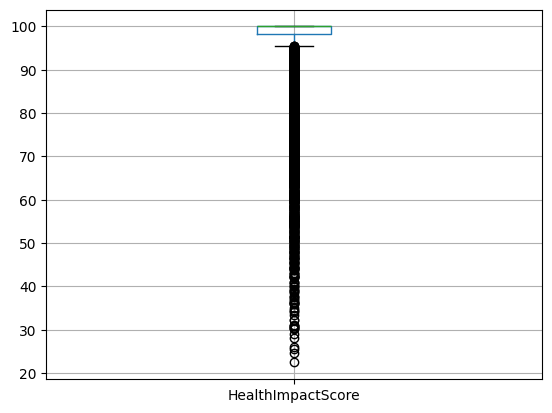

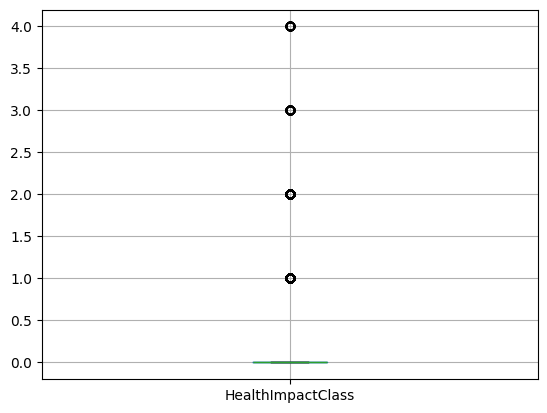

In [50]:
for i in df.columns:
  df.boxplot(column=i)
  plt.show()

In [51]:
df["CardiovascularCases"].describe()

,CardiovascularCases
count,5811.000000
mean,4.988986
std,2.216791
min,0.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,14.000000


In [52]:
df["CardiovascularCases"].value_counts()

,count
CardiovascularCases,
4,1062
5,1033
6,864
3,813
7,577
2,448
8,376
1,210
9,208


In [53]:
for i in df.select_dtypes(include=['int','float']).columns:
    q1=3.000
    q3=6.000
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
print("lower fence",lf)
print("upper fence",uf)

lower fence -1.5
upper fence 10.5


In [54]:
df["CardiovascularCases"]=np.where(df["CardiovascularCases"]>3.000,3.000,df["CardiovascularCases"])
df["CardiovascularCases"]=np.where(df["CardiovascularCases"]<6.000,6.000,df["CardiovascularCases"])

In [55]:
for i in df.columns:
    if i == "HealthImpactClass": # Skip outlier treatment for the target variable
        continue
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    df[i]=np.where(df[i]<lf,lf,df[i])

    df[i]=np.where(df[i]>uf,uf,df[i])

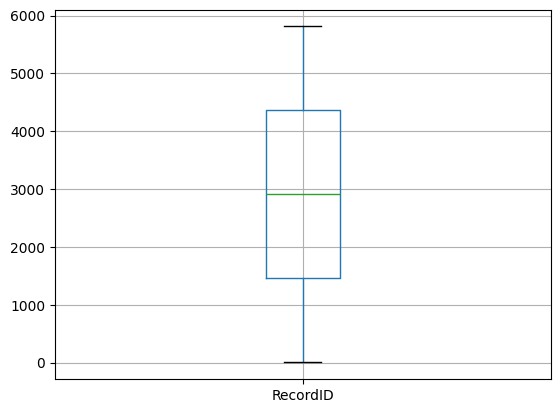

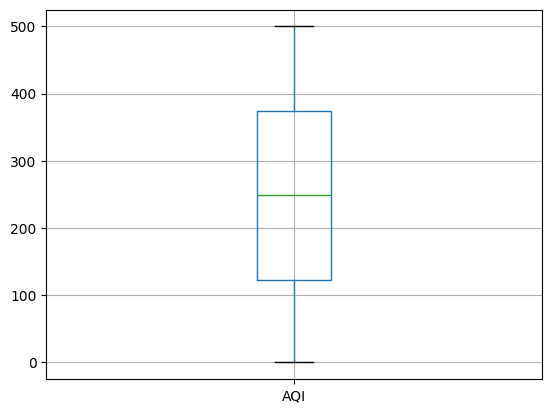

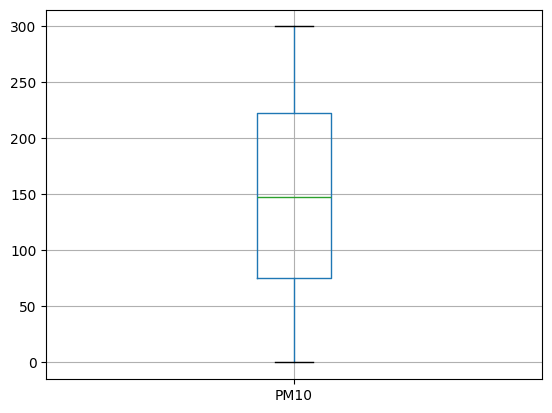

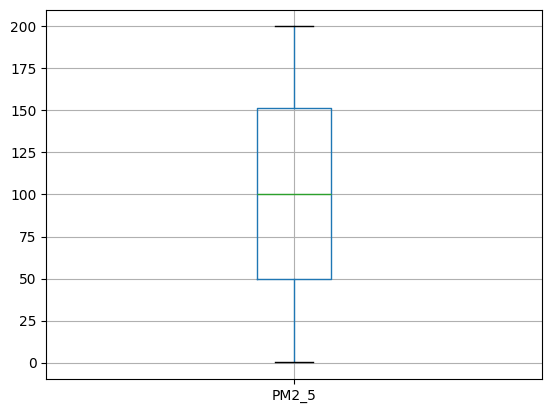

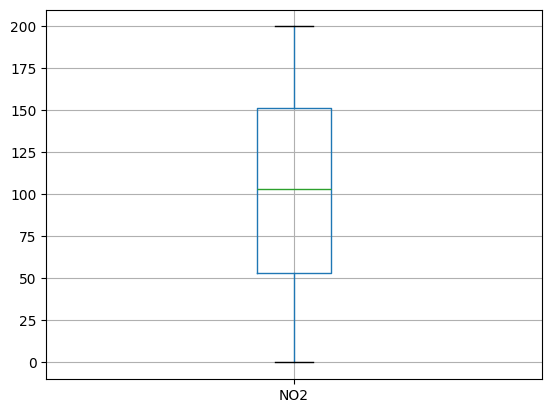

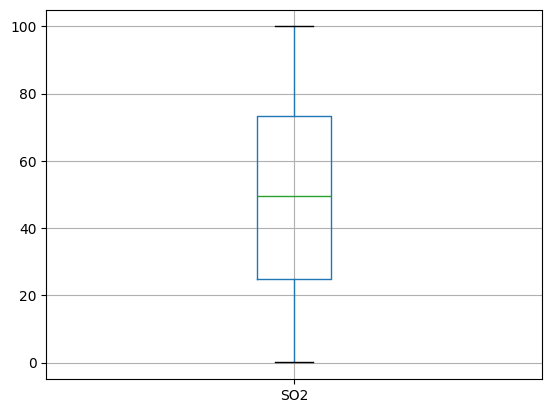

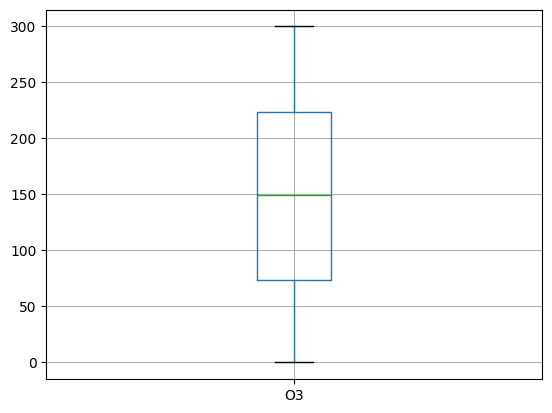

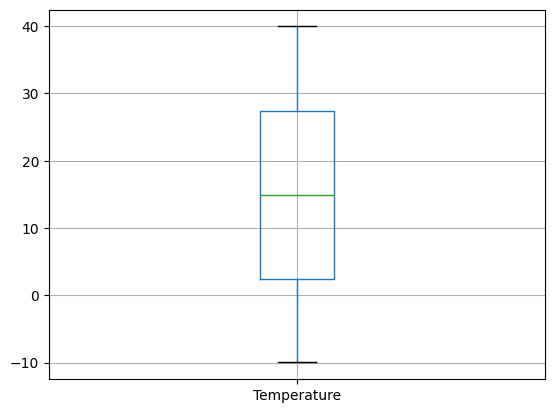

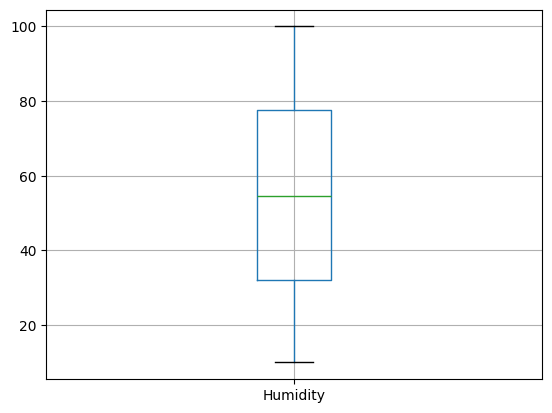

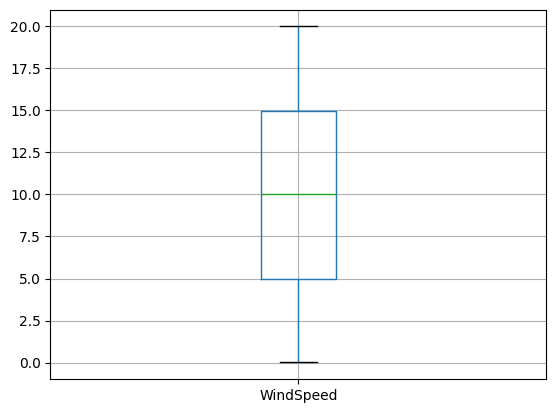

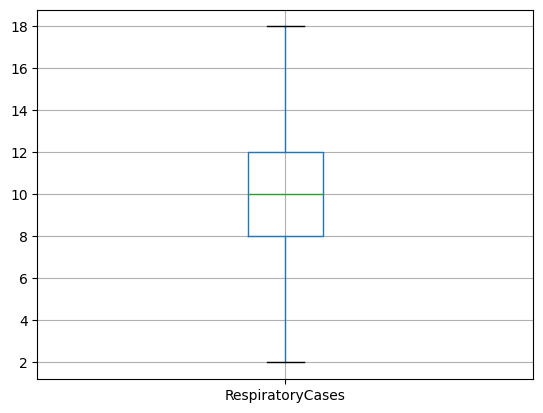

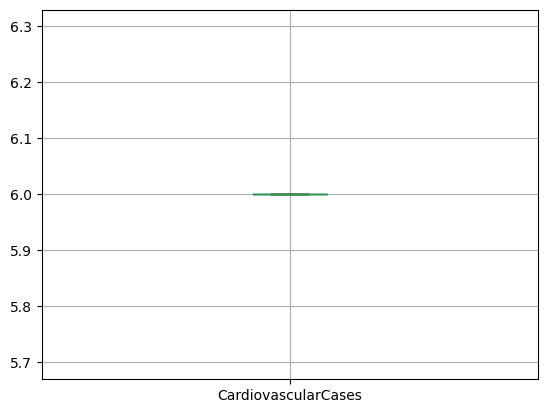

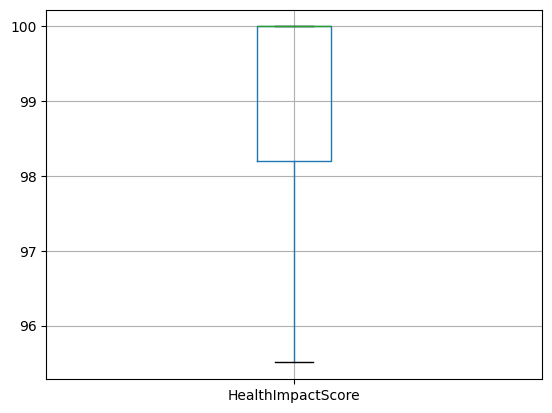

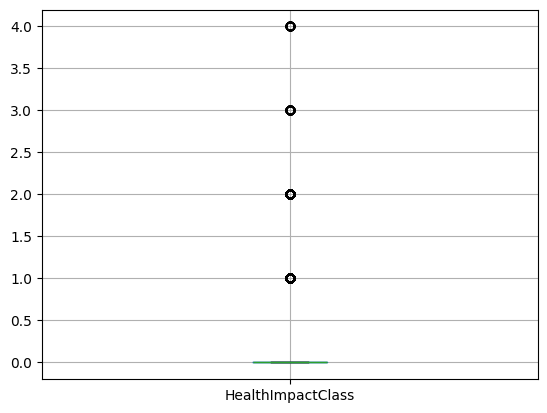

In [56]:
for i in df.columns:
  df.boxplot(column=i)
  plt.show()

In [57]:
x=df.drop(columns=["HealthImpactClass"])
y=df["HealthImpactClass"]

In [58]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [70]:
log=LogisticRegression()
print("Logistic Regression model initialized.")

Logistic Regression model initialized.


In [71]:
log.fit(x_train,y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

log_scaled = LogisticRegression(max_iter=1000) # Increased max_iter for robustness
log_scaled.fit(x_train_scaled, y_train)
print("Logistic Regression model trained successfully with scaled data.")

Logistic Regression model trained successfully with scaled data.


In [74]:
print("Train accuracy", log.score(x_train,y_train))
print("Test accuracy", log.score(x_test,y_test))



Train accuracy 0.8685456110154905
Test accuracy 0.8632846087704213


In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("train",dt.score(x_train,y_train))
print("test",dt.score(x_test,y_test))

train 1.0
test 0.8521066208082545


In [80]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=3,min_samples_leaf=2,random_state=55)

In [81]:
dt.fit(x_train,y_train)
print("Train",dt.score(x_train,y_train))
print("Test",dt.score(x_test,y_test))

Train 0.9623493975903614
Test 0.8641444539982803


In [82]:
dt=DecisionTreeClassifier(max_depth=10, random_state=55)
dt.fit(x_train,y_train)
print("train",dt.score(x_train,y_train))
print("test",dt.score(x_test,y_test))

train 0.9713855421686747
test 0.8615649183147034


In [83]:
dt1=DecisionTreeClassifier(criterion="gini",max_depth=10, min_samples_split=100, random_state=55)

In [84]:
dt1.fit(x_train,y_train)
print("Train",dt1.score(x_train,y_train))
print("Test",dt1.score(x_test,y_test))

Train 0.899526678141136
Test 0.8675838349097162


In [85]:
cr=["gini","entropy"]
md=[2,4,6,8,10,12]
mss=[10,20,30,40,50,60,70,80,90,100]
for c in cr:
    for m in md:
        for s in mss:
            dt=DecisionTreeClassifier(criterion=c,
                                     max_depth=m,
                                     min_samples_split=s,
                                     random_state=55)
            dt.fit(x_train,y_train)
            print("criterion->{} max_depth-> {} min_sample-> {}".format(c,m,s))
            print("train",dt.score(x_train,y_train))
            print("test",dt.score(x_test,y_test))
            print("*************************************")


criterion->gini max_depth-> 2 min_sample-> 10
train 0.854776247848537
test 0.8503869303525365
*************************************
criterion->gini max_depth-> 2 min_sample-> 20
train 0.854776247848537
test 0.8503869303525365
*************************************
criterion->gini max_depth-> 2 min_sample-> 30
train 0.854776247848537
test 0.8503869303525365
*************************************
criterion->gini max_depth-> 2 min_sample-> 40
train 0.854776247848537
test 0.8503869303525365
*************************************
criterion->gini max_depth-> 2 min_sample-> 50
train 0.854776247848537
test 0.8503869303525365
*************************************
criterion->gini max_depth-> 2 min_sample-> 60
train 0.854776247848537
test 0.8503869303525365
*************************************
criterion->gini max_depth-> 2 min_sample-> 70
train 0.854776247848537
test 0.8503869303525365
*************************************
criterion->gini max_depth-> 2 min_sample-> 80
train 0.854776247848537
test 0

In [86]:
cr=["gini","entropy"]
md=[2,4,6,8,10,12]
mss=[10,20,30,40,50,60,70,80,90,100]
train=[]
test=[]
for c in cr:
    for m in md:
        for s in mss:
            dt=DecisionTreeClassifier(criterion=c,
                                     max_depth=m,
                                     min_samples_split=s,
                                     random_state=55)
            dt.fit(x_train,y_train)
            train.append(round(dt.score(x_train,y_train),3))
            test.append(round(dt.score(x_test,y_test),3))

In [87]:
print(train)
print("*********")
print(test)

[0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.881, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.907, 0.906, 0.906, 0.906, 0.905, 0.902, 0.9, 0.9, 0.899, 0.895, 0.934, 0.928, 0.927, 0.924, 0.917, 0.91, 0.909, 0.908, 0.905, 0.898, 0.956, 0.941, 0.932, 0.927, 0.92, 0.914, 0.911, 0.91, 0.908, 0.9, 0.961, 0.944, 0.935, 0.931, 0.922, 0.916, 0.912, 0.91, 0.908, 0.9, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.864, 0.863, 0.862, 0.862, 0.862, 0.862, 0.862, 0.862, 0.862, 0.862, 0.904, 0.9, 0.898, 0.898, 0.898, 0.898, 0.897, 0.896, 0.895, 0.895, 0.936, 0.927, 0.92, 0.918, 0.907, 0.905, 0.904, 0.901, 0.899, 0.895, 0.964, 0.939, 0.926, 0.921, 0.909, 0.907, 0.906, 0.901, 0.9, 0.895, 0.97, 0.942, 0.927, 0.922, 0.909, 0.907, 0.906, 0.901, 0.9, 0.895]
*********
[0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.854, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.874, 0.874, 0.874, 0.874, 0.874, 0.873, 0.871

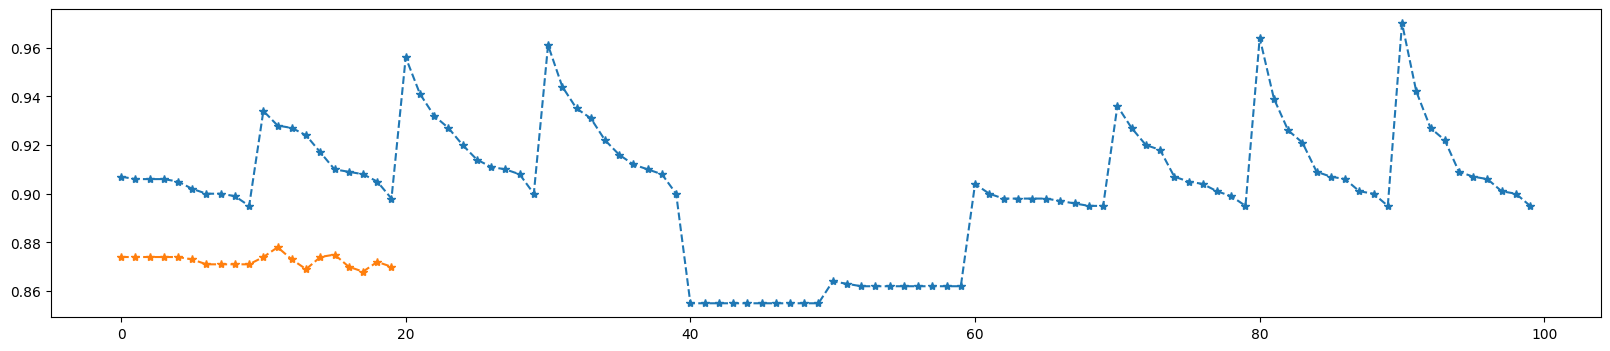

In [89]:
plt.figure(figsize=(20,4))
plt.plot(train[20:],"*--")
plt.plot(test[20:40],"*--")

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
cs=["gini","entropy"]
md=[2,4,6,8,10,12]
mss=[10,20,30,40,50,60,70,80,90,100]
for c in cr:
    for m in md:
        for s in mss:
            dt=DecisionTreeClassifier(criterion=c,
                                     max_depth=m,
                                     min_samples_split=s,
                                     random_state=55)

In [92]:
para={"criterion":["gini","entropy"],
     "max_depth":[2,4,6,8,10,12],"min_samples_split":[10,20,30,40,50,60,70,80,90,100]}
tr=DecisionTreeClassifier(random_state=55)
gs=GridSearchCV(tr,param_grid=para)
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=55),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]})

In [93]:
dt=DecisionTreeClassifier(criterion=c,
                                     max_depth=m,
                                     min_samples_split=s,
                                     random_state=55)

In [94]:
dt.fit(x_train,y_train)
print("train",dt.score(x_train,y_train))
print("test",dt.score(x_test,y_test))

train 0.8954388984509466
test 0.8710232158211522


In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_train,dt.predict(x_train)))
print("************")
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      3855
         1.0       0.62      0.60      0.61       455
         2.0       0.52      0.53      0.53       220
         3.0       0.50      0.12      0.19        75
         4.0       0.49      0.44      0.46        43

    accuracy                           0.90      4648
   macro avg       0.62      0.53      0.55      4648
weighted avg       0.89      0.90      0.89      4648

************
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       953
         1.0       0.54      0.54      0.54       124
         2.0       0.50      0.53      0.51        53
         3.0       0.60      0.15      0.24        20
         4.0       0.17      0.15      0.16        13

    accuracy                           0.87      1163
   macro avg       0.55      0.47      0.48      1163
weighted avg       0.87      0.87      0.87      1163



In [97]:
from sklearn import tree

In [98]:
rules=tree.export_text(dt,feature_names=x_train.columns.to_list())

In [99]:
from sklearn.tree import plot_tree

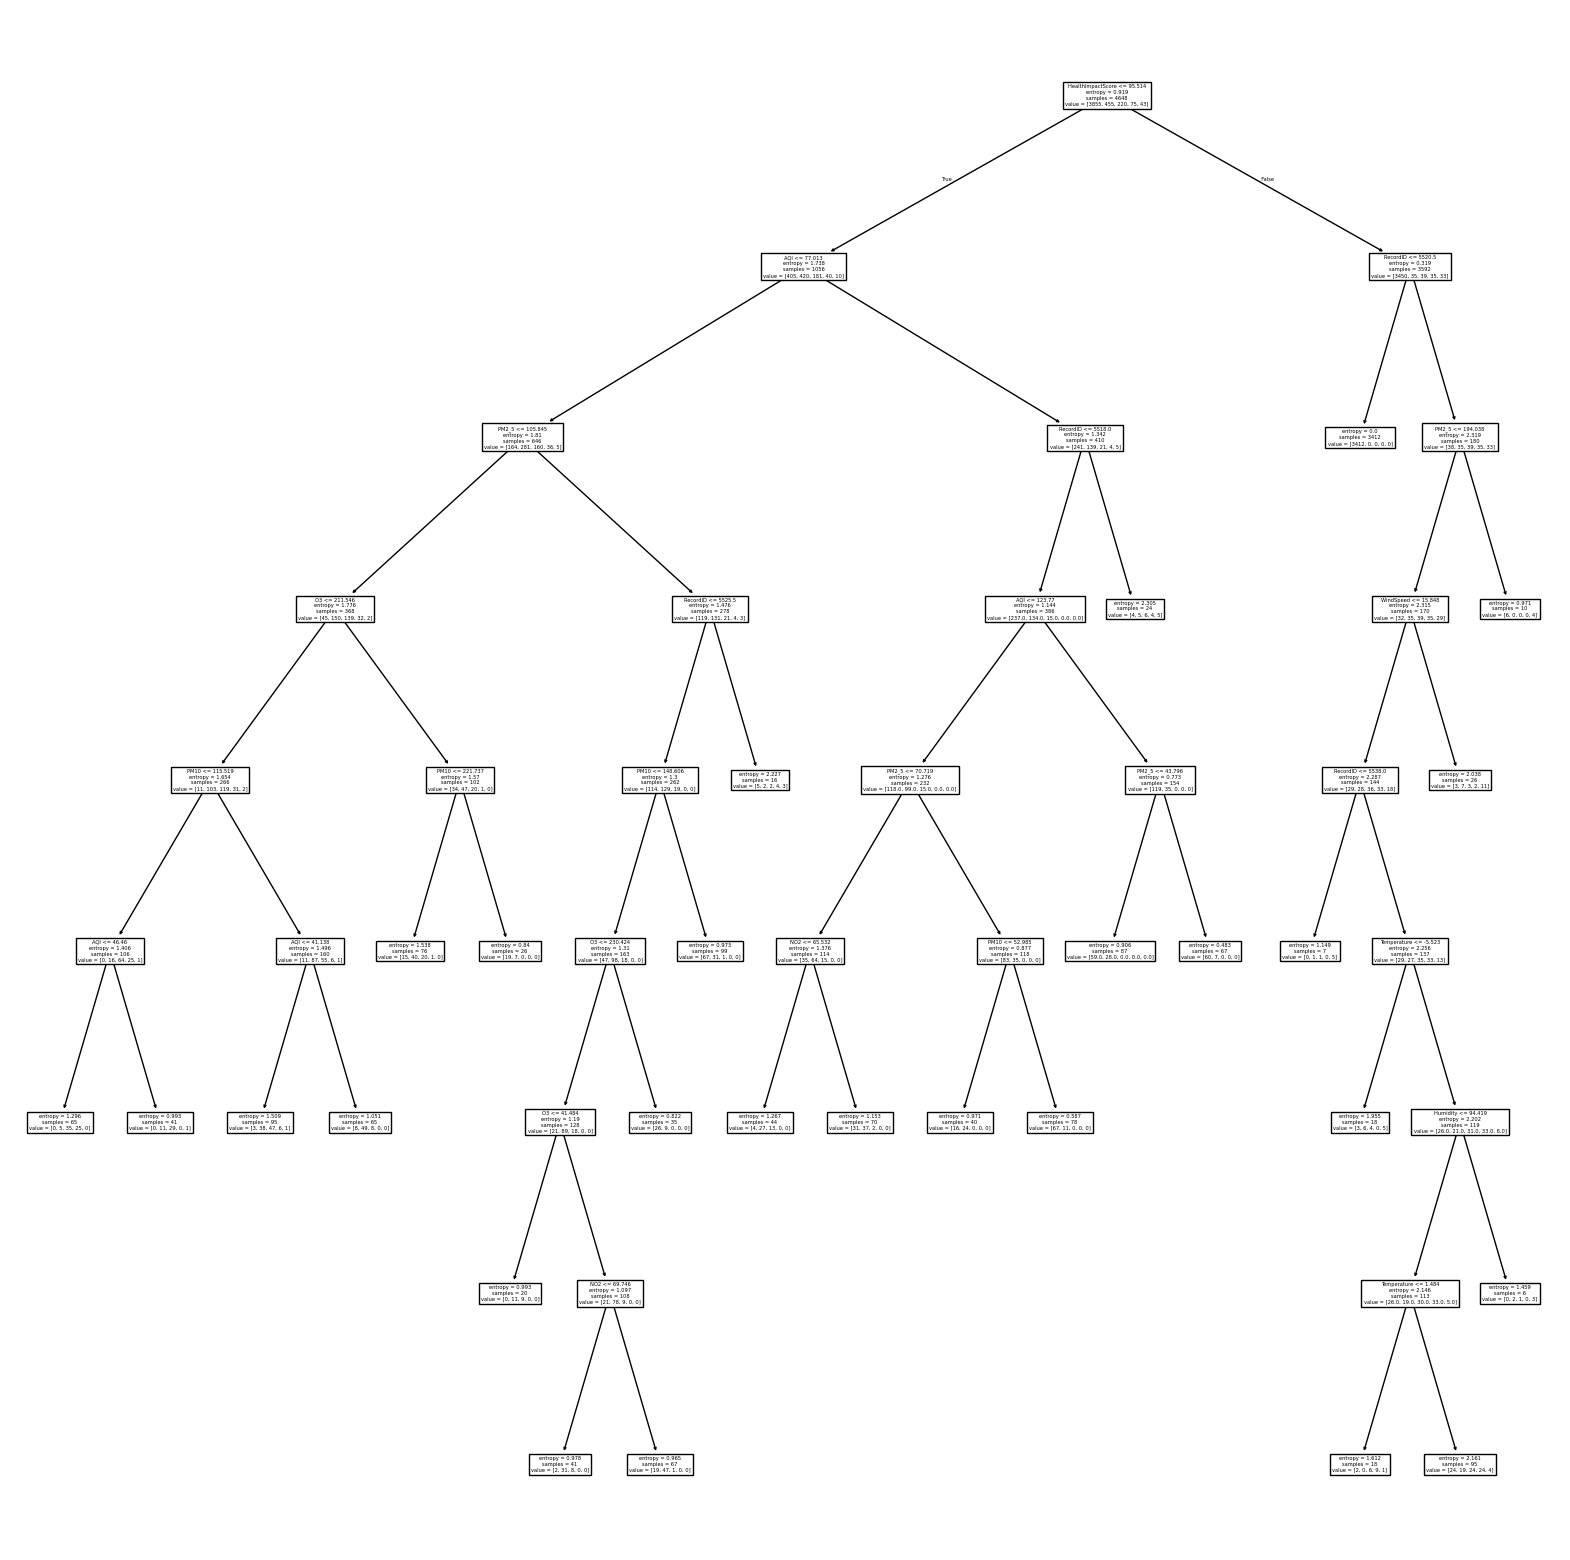

In [100]:
plt.figure(figsize=(20,20))
plot_tree(dt,feature_names=x_train.columns)
plt.show()